# Introduction to Time Series Analysis

### 27th December 2021 created by Yan Ge


Welcome to the Advanced Financial Technology course. In this course we will introduce time series data analysis that is generated by financial markets. Therefore, to analyse financial markets, it is necessary to be competent in time series analysis. This unit commences with approaches to solve common data engineering and analysis challenges in time series, including wrangling time series data, undertaking exploratory time series data analysis, storing temporal data, simulating time series data, generating and selecting features for a time series, forecasting and classifying time series with statistical machine learning and deep learning, and evaluating accuracy and performance. The unit then considers methods for applying financial time series analysis and machine learning for managing financial investments. Students will be introduced to active portfolio management and gain a practical understanding of concepts such as expected returns, signal weighting, risk management, and portfolio construction.

In this Notebook, we will focus on:1) Introduction to Jupyter Notebook; 2) Time-series data visualisation; 3) Time-series data wrangling; 4) Imputation for missing time-series data.

Sources of this tutorial: 1). https://github.com/maalvarezl/MLAI; 2) https://github.com/Apress/hands-on-time-series-analylsis-python

### Introduction to Jupyter Notebook

In this module, we will be using Python for our programming language. A prerequisite of attending this course is that you have learnt at least one programming language in the past. It is not our objective to teach you python.  If you have not experienced python before it may be worth your while spending some time understanding the language. There are resources available for you to do this [here](https://docs.python.org/3/tutorial/index.html) that are based on the standard console. An introduction to the Jupyter notebook (formerly known as the IPython notebook) is available [here](https://ipython.readthedocs.io/en/stable/). 

We are working in the Jupyter notebook (formerly known as the IPython notebook). It provides an environment for interacting with data in a natural way which is reproducible. We will be learning how to make use of the notebook throughout the course. The notebook allows us to combine code with descriptions, interactive visualizations, plots etc. In fact it allows us to do many of the things we need for data science. Notebooks can also be easily shared through the internet for ease of communication of ideas. The box this text is written in is a *markdown* box. Below we have a *code* box.

In [17]:
print("This is the Jupyter notebook")
print("It provides a platform for:")
words = ['Advanced', 'Financial', 'Techonology']

from random import shuffle
for i in range(3):
    shuffle(words)
    print(' '.join(words))

This is the Jupyter notebook
It provides a platform for:
Financial Techonology Advanced
Techonology Advanced Financial
Advanced Techonology Financial


Have a play with the code in the above box. Think about the following questions: what is the difference between `CTRL-enter` and `SHIFT-enter` in running the code? What does the command `shuffle` do? Can you find out by typing `shuffle?` in a code box? Once you've had a play with the code we can load in some data using the pandas library for time-series data analysis. 

# Time-Series Data Wrangling

Data: In this tutorial, we will use a daily stock price of Apple.Inc (one year: from 28/Dec/2020 to 27/Dec/2021), which is derived from Yahoo Finance. This data includes open, high and low prices.

In [18]:
import pandas as pd

In [20]:
df=pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close
0,28/12/2020,133.990005,137.339996,133.509995,136.690002
1,29/12/2020,138.050003,138.789993,134.339996,134.869995
2,30/12/2020,135.580002,135.990005,133.399994,133.720001
3,31/12/2020,134.080002,134.740005,131.720001,132.690002
4,04/01/2021,133.520004,133.610001,126.760002,129.410004
...,...,...,...,...,...
247,20/12/2021,168.279999,170.580002,167.460007,169.750000
248,21/12/2021,171.559998,173.199997,169.119995,172.990005
249,22/12/2021,173.039993,175.860001,172.149994,175.639999
250,23/12/2021,175.850006,176.850006,175.270004,176.279999


In [21]:
df.head()

,Date,Open,High,Low,Close
0,28/12/2020,133.990005,137.339996,133.509995,136.690002
1,29/12/2020,138.050003,138.789993,134.339996,134.869995
2,30/12/2020,135.580002,135.990005,133.399994,133.720001
3,31/12/2020,134.080002,134.740005,131.720001,132.690002
4,04/01/2021,133.520004,133.610001,126.760002,129.410004


In [22]:
df=pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df

,Open,High,Low,Close
Date,,,,
2020-12-28,133.990005,137.339996,133.509995,136.690002
2020-12-29,138.050003,138.789993,134.339996,134.869995
2020-12-30,135.580002,135.990005,133.399994,133.720001
2020-12-31,134.080002,134.740005,131.720001,132.690002
2021-01-04,133.520004,133.610001,126.760002,129.410004
...,...,...,...,...
2021-12-20,168.279999,170.580002,167.460007,169.750000
2021-12-21,171.559998,173.199997,169.119995,172.990005
2021-12-22,173.039993,175.860001,172.149994,175.639999


In [23]:
# extract all prices that are open, high, low and close in Auguest 2021
df.loc['08/2021']

,Open,High,Low,Close
Date,,,,
2021-08-02,146.360001,146.949997,145.250000,145.520004
2021-08-03,145.809998,148.039993,145.179993,147.360001
2021-08-04,147.270004,147.789993,146.279999,146.949997
2021-08-05,146.979996,147.839996,146.169998,147.059998
2021-08-06,146.350006,147.110001,145.630005,146.139999
2021-08-09,146.199997,146.699997,145.520004,146.089996
2021-08-10,146.440002,147.710007,145.300003,145.600006
2021-08-11,146.050003,146.720001,145.529999,145.860001
2021-08-12,146.190002,149.050003,145.839996,148.889999


In [28]:
# extract close price in Auguest 2021
df.loc['08/2021'].Close

Date
2021-08-02    145.520004
2021-08-03    147.360001
2021-08-04    146.949997
2021-08-05    147.059998
2021-08-06    146.139999
2021-08-09    146.089996
2021-08-10    145.600006
2021-08-11    145.860001
2021-08-12    148.889999
2021-08-13    149.100006
2021-08-16    151.119995
2021-08-17    150.190002
2021-08-18    146.360001
2021-08-19    146.699997
2021-08-20    148.190002
2021-08-23    149.710007
2021-08-24    149.619995
2021-08-25    148.360001
2021-08-26    147.539993
2021-08-27    148.600006
2021-08-30    153.119995
2021-08-31    151.830002
Name: Close, dtype: float64

In [29]:
# calculate the mean value of the close price in August 2021.
df.loc['08/2021'].Close.mean()

148.17772740909092

In [30]:
# calculate the median value of the close price in August 2021.
df.loc['08/2021'].Close.median()

147.8649975

In [31]:
# extract all prices that are open, high, low and close in 03 Auguest 2021
df.loc['08/03/2021']

Open     145.809998
High     148.039993
Low      145.179993
Close    147.360001
Name: 2021-08-03 00:00:00, dtype: float64

In [42]:
# extract all prices from 09 August 2021 to 03 September 2021
df.sort_index().loc['08/08/2021':'09/03/2021',:]

,Open,High,Low,Close
Date,,,,
2021-08-09,146.199997,146.699997,145.520004,146.089996
2021-08-10,146.440002,147.710007,145.300003,145.600006
2021-08-11,146.050003,146.720001,145.529999,145.860001
2021-08-12,146.190002,149.050003,145.839996,148.889999
2021-08-13,148.970001,149.440002,148.270004,149.100006
2021-08-16,148.539993,151.190002,146.470001,151.119995
2021-08-17,150.229996,151.679993,149.089996,150.190002
2021-08-18,149.800003,150.720001,146.149994,146.360001
2021-08-19,145.029999,148.000000,144.500000,146.699997


In [50]:
# Resampling the data on monthly frequency and calculate the mean value
df.Close.resample("M").mean()

Date
2020-12-31    134.492500
2021-01-31    133.036842
2021-02-28    131.531579
2021-03-31    121.871304
2021-04-30    131.812858
2021-05-31    126.784000
2021-06-30    129.958636
2021-07-31    145.139524
2021-08-31    148.177727
2021-09-30    148.306190
2021-10-31    145.563809
2021-11-30    154.255716
2021-12-31    172.368500
Freq: M, Name: Close, dtype: float64

# Time-Series Data Visualisation

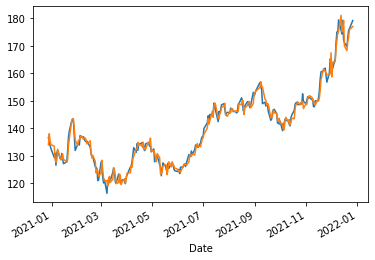

In [55]:
%matplotlib inline
df.Close.plot()
df.Open.plot()
# df.Low.plot()

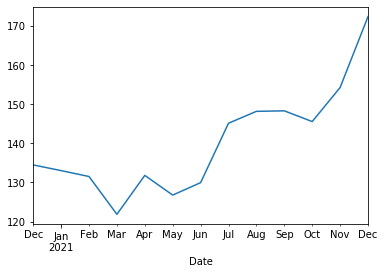

In [56]:
%matplotlib inline
df.Close.resample("M").mean().plot()

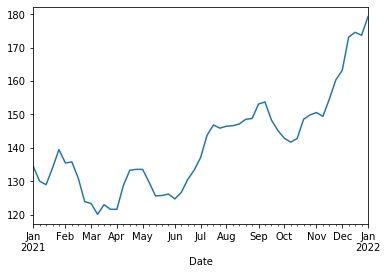

In [57]:
df.Close.resample("W").mean().plot()

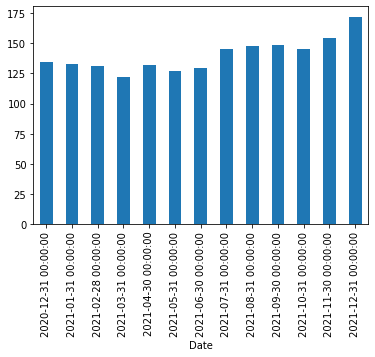

In [58]:
df.Close.resample('M').mean().plot(kind="bar")

# Handling Time-Series Missing Data

In [2]:
import pandas as pd
dfmiss = pd.read_csv('AAPL_null.csv',index_col =0,
                parse_dates=['Date'], dayfirst=True)
print(dfmiss)

                  Open
Date                  
2020-12-28  133.990005
2020-12-29  138.050003
2020-12-30         NaN
2020-12-31  134.080002
2021-01-04  133.520004
...                ...
2021-12-20  168.279999
2021-12-21  171.559998
2021-12-22  173.039993
2021-12-23         NaN
2021-12-27  177.085007

[252 rows x 1 columns]


Count the number of missing values in open prices.

In [60]:
dfmiss.isnull().sum()

Open    17
dtype: int64

In [61]:
dfmiss.bfill()

,Open
Date,
2020-12-28,133.990005
2020-12-29,138.050003
2020-12-30,134.080002
2020-12-31,134.080002
2021-01-04,133.520004
...,...
2021-12-20,168.279999
2021-12-21,171.559998
2021-12-22,173.039993


In [62]:
dfmiss.ffill()

,Open
Date,
2020-12-28,133.990005
2020-12-29,138.050003
2020-12-30,138.050003
2020-12-31,134.080002
2021-01-04,133.520004
...,...
2021-12-20,168.279999
2021-12-21,171.559998
2021-12-22,173.039993


Question: Please consider what the difference between dfmiss.bfill() and dfmiss.ffill()?

In [65]:
dfmiss.fillna(150)

,Open
Date,
2020-12-28,133.990005
2020-12-29,138.050003
2020-12-30,150.000000
2020-12-31,134.080002
2021-01-04,133.520004
...,...
2021-12-20,168.279999
2021-12-21,171.559998
2021-12-22,173.039993


Question: What is dfmiss.fillna used for?

In [3]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

print(dfmiss)


                  Open
Date                  
2020-12-28  133.990005
2020-12-29  138.050003
2020-12-30         NaN
2020-12-31  134.080002
2021-01-04  133.520004
...                ...
2021-12-20  168.279999
2021-12-21  171.559998
2021-12-22  173.039993
2021-12-23         NaN
2021-12-27  177.085007

[252 rows x 1 columns]


Question: What are values filled into NaN place? Why such cases happen?

In [4]:
knnimp_df = imputer.fit_transform(dfmiss)
print(knnimp_df)

[[133.990005  ]
 [138.050003  ]
 [140.21334105]
 [134.080002  ]
 [133.520004  ]
 [128.889999  ]
 [127.720001  ]
 [128.360001  ]
 [140.21334105]
 [129.190002  ]
 [128.5       ]
 [128.759995  ]
 [130.800003  ]
 [128.779999  ]
 [127.779999  ]
 [128.660004  ]
 [133.800003  ]
 [136.279999  ]
 [143.070007  ]
 [143.600006  ]
 [143.429993  ]
 [139.520004  ]
 [135.830002  ]
 [133.75      ]
 [135.729996  ]
 [135.759995  ]
 [136.300003  ]
 [137.350006  ]
 [136.029999  ]
 [136.619995  ]
 [136.479996  ]
 [135.899994  ]
 [134.350006  ]
 [135.490005  ]
 [131.25      ]
 [129.199997  ]
 [130.240005  ]
 [128.009995  ]
 [123.760002  ]
 [124.940002  ]
 [124.68      ]
 [122.589996  ]
 [123.75      ]
 [128.410004  ]
 [140.21334105]
 [121.75      ]
 [120.980003  ]
 [120.93      ]
 [119.029999  ]
 [121.690002  ]
 [140.21334105]
 [120.400002  ]
 [121.410004  ]
 [125.699997  ]
 [124.050003  ]
 [122.879997  ]
 [119.900002  ]
 [120.330002  ]
 [123.330002  ]
 [122.82      ]
 [119.540001  ]
 [120.349998  ]
 [121.65